In [2]:
import numpy as np
from matplotlib import pyplot as plt
data = '''
# bond_length   REF         AFQMC/CISD             AFQMC/CCSD_PT2             AFQMC/HF            CCSD(T)
    2.118	-109.27834  -109.2778 +/- 0.0002  -109.277259 +/- 0.000424  -109.2780 +/- 0.0007    -109.27647
    2.4	    -109.2384   -109.2377 +/- 0.0004  -109.236843 +/- 0.000475  -109.2376 +/- 0.0007    -109.23202
    2.7	    -109.16031  -109.1573 +/- 0.0006  -109.157264 +/- 0.000536  -109.1593 +/- 0.0007    -109.14731
    3	    -109.08621  -109.0830 +/- 0.0005  -109.081862 +/- 0.000553  -109.0898 +/- 0.0009    -109.06571
    3.6	    -108.99491  -108.9946 +/- 0.0002  -108.993753 +/- 0.000252  -109.0045 +/- 0.0006    -108.97982
    4.2	    -108.96695  -108.9676 +/- 0.0002  -108.966965 +/- 0.000137  -108.9759 +/- 0.0004    -108.96002
'''

In [6]:
bonds = []
refs = []
afqmc_cisds = []
afqmc_cisd_errs = []
afqmc_pt2s = []
afqmc_pt2_errs = []
afqmc_hfs = []
afqmc_hf_errs = []
ccsd_ts = []
for line in data.splitlines():
    if not line.startswith('#') and len(line) > 0:
        parts = line.split()
        bond = float(parts[0])
        ref = float(parts[1])
        afqmc_cisd = float(parts[2])
        afqmc_cisd_err = float(parts[4])
        afqmc_pt2 = float(parts[5])
        afqmc_pt2_err = float(parts[7])
        afqmc_hf = float(parts[8])
        afqmc_hf_err = float(parts[10])
        ccsd_t = float(parts[11])
        bonds = np.hstack((bonds,bond))
        refs = np.hstack((refs,ref))
        afqmc_cisds = np.hstack((afqmc_cisds,afqmc_cisd))
        afqmc_cisd_errs = np.hstack((afqmc_cisd_errs,afqmc_cisd_err))
        afqmc_pt2s = np.hstack((afqmc_pt2s,afqmc_pt2))
        afqmc_pt2_errs = np.hstack((afqmc_pt2_errs,afqmc_pt2_err))
        afqmc_hfs = np.hstack((afqmc_hfs,afqmc_hf))
        afqmc_hf_errs = np.hstack((afqmc_hf_errs,afqmc_hf_err))
        ccsd_ts = np.hstack((ccsd_ts,ccsd_t))

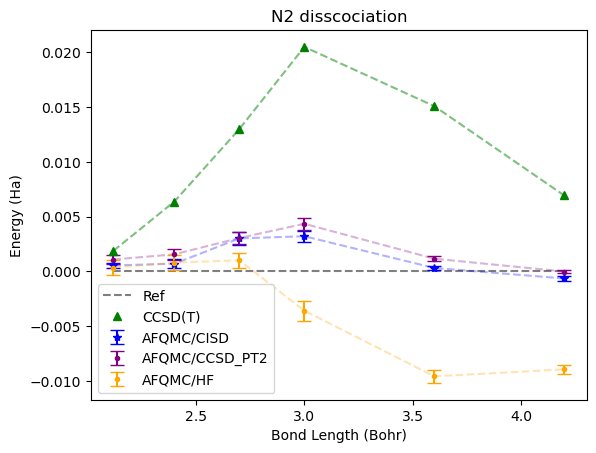

In [10]:
plt.plot(bonds,refs-refs, '--', color='black', alpha=0.5,label='Ref')
plt.errorbar(bonds,afqmc_cisds-refs,yerr=afqmc_cisd_errs,fmt='*',color='blue',capsize=5,label='AFQMC/CISD')
plt.plot(bonds,afqmc_cisds-refs, '--', color='blue', alpha=0.3)
plt.errorbar(bonds,afqmc_pt2s-refs,yerr=afqmc_pt2_errs,fmt='.',color='purple',capsize=5,label='AFQMC/CCSD_PT2')
plt.plot(bonds,afqmc_pt2s-refs, '--', color='purple', alpha=0.3)
plt.errorbar(bonds,afqmc_hfs-refs,yerr=afqmc_hf_errs,fmt='.',color='orange',capsize=5,label='AFQMC/HF')
plt.plot(bonds,afqmc_hfs-refs, '--', color='orange', alpha=0.3)
plt.plot(bonds,ccsd_ts-refs, '^', color='green',label='CCSD(T)')
plt.plot(bonds,ccsd_ts-refs, '--', color='green', alpha=0.5)
plt.xlabel('Bond Length (Bohr)')
plt.ylabel('Energy (Ha)')
plt.title('N2 disscociation')
plt.legend()
plt.show()